<center><h1><b>Iris Flower Classification Project</b></h1></center>

## **Background**: 
The Iris dataset is one of the most widely used datasets in machine learning and statistics. It was introduced by Ronald Fisher in 1936 to study differences among three species of iris flowers: Setosa, Versicolor, and Virginica.

## **Objective**: 
The objective of this project is to explore, understand, and visualize the Iris dataset, identifying patterns and relationships among features, and to build a baseline classification model to predict the species of iris flowers.

## **Dataset**: 
The dataset contains 150 samples, with four numerical features for each flower:
- Sepal length (cm)
- Sepal width (cm)
- Petal length (cm)
- Petal width (cm)

### Importing necessary libraries

In [1]:
#libraries for reading and manipulating the data
import numpy as np
import pandas as pd

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#libraries for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#libraries for model building
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#libraries for evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline

In [2]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
species_palette = { 
    "Iris-setosa": "#5e1a85",      # violet
    "Iris-versicolor": "#1363fb",  # blue
    "Iris-virginica": "#71d0c4"    # aqua
}

### Reading the dataset

In [4]:
iris= pd.read_csv('IRIS.csv')

In [5]:
data=iris.copy()

## **Overview of the dataset**

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


data.tail()

In [7]:
data.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
112,6.8,3.0,5.5,2.1,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
15,5.7,4.4,1.5,0.4,Iris-setosa
119,6.0,2.2,5.0,1.5,Iris-virginica
19,5.1,3.8,1.5,0.3,Iris-setosa
26,5.0,3.4,1.6,0.4,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
92,5.8,2.6,4.0,1.2,Iris-versicolor
108,6.7,2.5,5.8,1.8,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica


### Understanding the shape of the dataset

In [8]:
#Number of rows and columns in the dataset (rows, columns)
data.shape

(150, 5)

#### Observations: 
- The dataset contains 150 rows and 5 columns.

### Checking the datatype and number non-null values in the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Observations:
- The dataset contains no null values.
- The target column 'species' is of type object.
- All the feature columns are of type float64.

### Summary of the dataset

In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Observations:
- The sepal_length varies from 4.3 cm to 7.9 cm and sepal_width varies from 2.0 cm to 4.4  cm.
- The petal_length varies from 1.0 cm to 6.9 m and petal_width varies from 0.1 cm to 2.5 cm.
- The mean values for sepal_length, sepal_width, petal_length and petal_width are 5.84 cm, 3.05 cm, 3.75 cm and 1.19 cm respectively.

In [11]:
data.describe(include=['object'])

,species
count,150
unique,3
top,Iris-setosa
freq,50


#### Observations:
- There are 3 unique categories for species column.
- Iris-setosa being the most frequent category.

### Unique categories in species column

In [12]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#### Observations:
- The number of observations belonging to each class are equal.
- All have 50 values belonging to each class.
- The dataset is fairly balanced.

In [13]:
data['species'].value_counts(normalize= True)

species
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: proportion, dtype: float64

#### Observations:
- There are 33 % observations belonging to each of three classes i.e. Iris-setosa, Iris-versicolor and Iris-virginica.

### Number of missing values in the dataset

In [14]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

#### Observations:
- There are no missing values in the dataset.

### Number of duplicate rows in the dataset

In [15]:
data.duplicated().sum()

np.int64(3)

#### Observations:
- There are 3 duplicate rows in the dataset.

In [16]:
data[data.duplicated(keep= False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


## **Exploratory Data Analysis**

### Univariate Analysis

In [17]:
def hist_box_plot(data):
    cols = data.select_dtypes(include=['int64', 'float64']).columns
    fig, axes = plt.subplots(len(cols), 2, figsize=(12, 5 * len(cols)))

   
    for i, col in enumerate(cols):
        # Histogram (normalized)
        axes[i, 0].hist(data[col], bins=20, density=True, alpha=0.6)
        
        # KDE using pandas
        data[col].plot(kind='kde', ax=axes[i, 0])
        
        axes[i, 0].set_title(f'Histogram + KDE of {col}')
        axes[i, 0].set_xlabel(col)
        axes[i, 0].set_ylabel('Density')
    
        # Boxplot
        axes[i, 1].boxplot(data[col], vert=False)
        axes[i, 1].set_title(f'Boxplot of {col}')
        axes[i, 1].set_xlabel(col)
    plt.show()

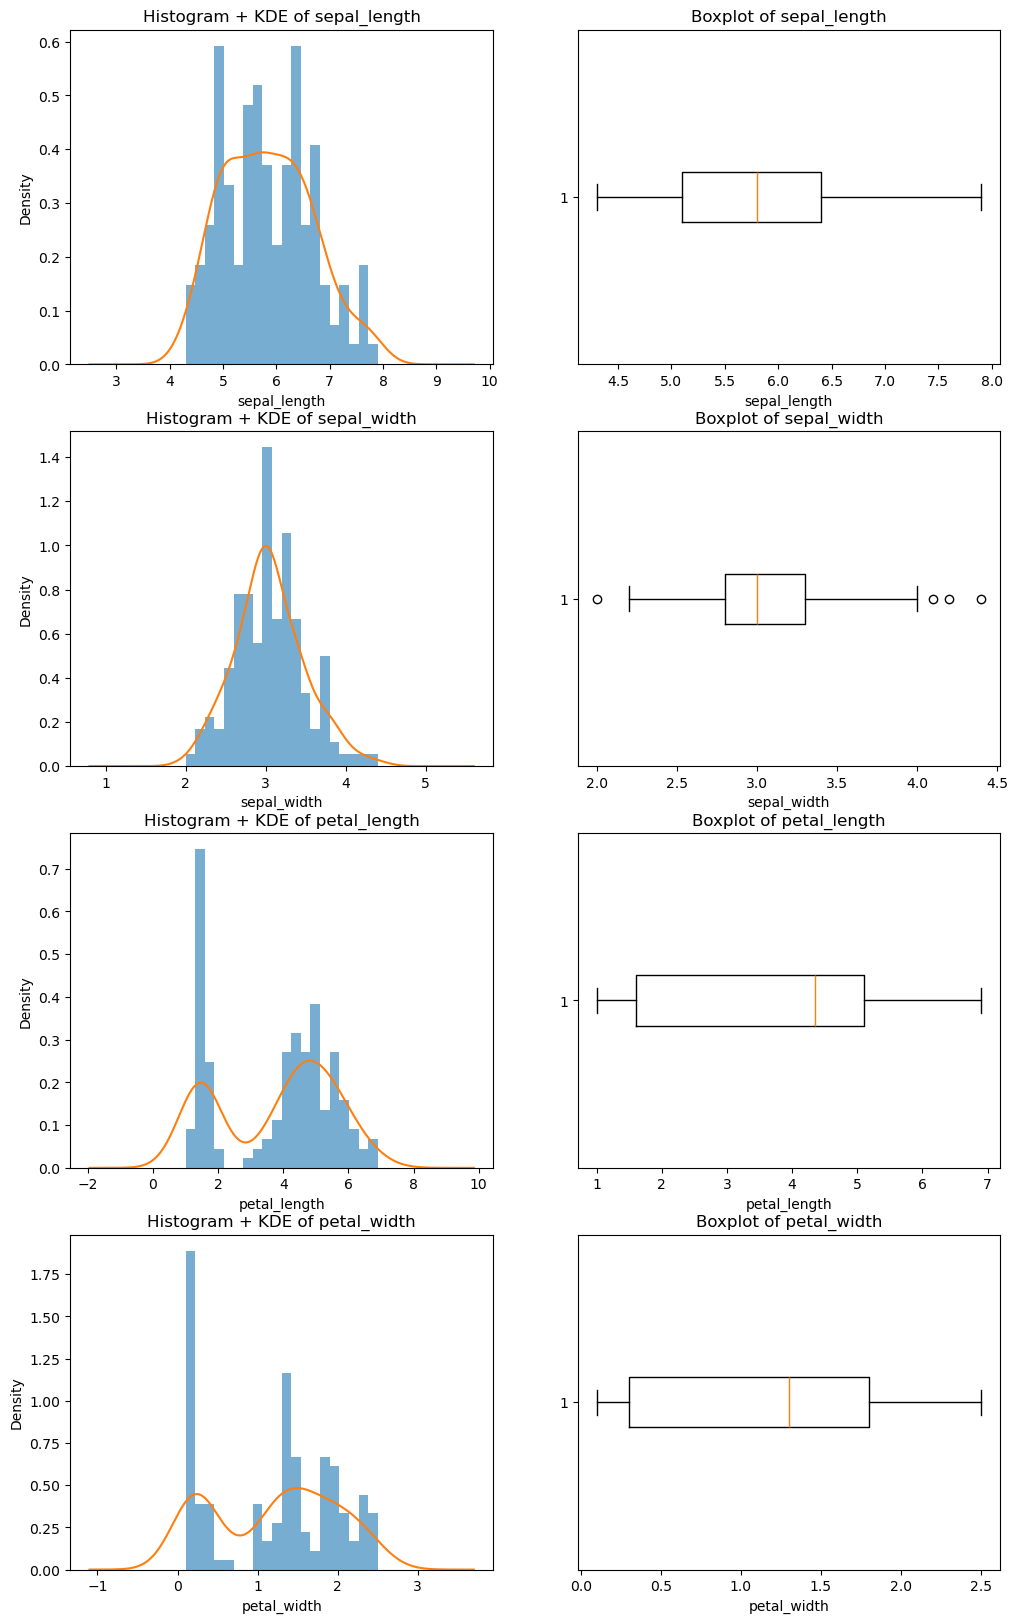

In [18]:
hist_box_plot(data)

#### Observations:
- **Sepal length**:
  - Sepal length distribution shows moderate variability with roughly normal distribution.
  - Values lie between 4.5 cm to 7 cm.
- **Sepal width**:
  - Sepal width distribution is nearly normal distribution.
  - Very few outliers are present on either end.
- **Petal length**
  - Petal length has multimodal distribution.
  - The distribution has wide range.
- **Petal width**
  - This distribution is also multimodal with wide range.
  - It has no outliers.

### Target variable analysis

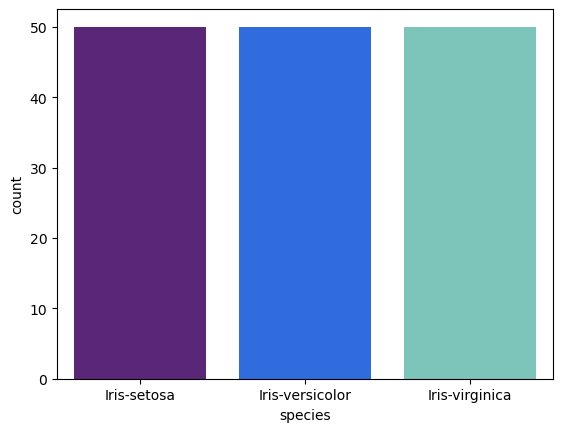

In [19]:
sns.countplot(data= data, x= 'species',hue= 'species', palette= species_palette)
plt.show()

#### Observations:
- The dataset has equal representation from all three kinds of species.
- The dataset is balanced.

### Bivariate Analysis

In [ ]:
plt.figure(figsize= (10,5))
corr_matrix= data.corr(numeric_only= True)
sns.heatmap(corr_matrix, annot= True, vmin= -1, vmax= 1)
plt.show()

#### Observations:
- Petal length and petal width exhibit a very strong positive correlation of 0.96.
- Sepal length is moderately correlated with petal features.
- Sepal width shows weak correlation with other variables.
- Petal-related features dominate the predictive structure of the dataset.

In [ ]:
sns.boxplot(x='species', y='sepal_length', data=data, hue='species', palette= species_palette)
plt.title("Sepal Length Distribution Across Iris Species")
plt.show()

#### Observations:
- Setosa has the smallest median sepal length.
- Virginica has the largest median sepal length.
- Significant overlap exists between Versicolor and Virginica.
- Sepal length alone is insufficient for accurate classification.

In [ ]:
sns.boxplot(x='species', y='sepal_width', data=data, hue='species', palette= species_palette)
plt.title("Sepal Width Distribution Across Iris Species")
plt.show()

#### Observations:
- Setosa exhibits the highest median sepal width.
- Versicolor and Virginica show substantial overlap.
- Sepal width provides partial discrimination and is most useful when combined with other features.

In [ ]:
sns.boxplot(x='species', y='petal_length', data=data, hue='species', palette= species_palette)
plt.title("Petal Length Distribution Across Iris Species")
plt.show()

#### Observations:
- Setosa is completely separable based on petal length.
- Versicolor and Virginica show minimal overlap.
- Petal length is a highly discriminative feature.

In [ ]:
sns.boxplot(x='species', y='petal_width', data=data, hue= 'species', palette= species_palette)
plt.title("Petal Width Distribution Across Iris Species")
plt.show()

#### Observations:
- Setosa is completely separable based on petal width.
- Minimal overlap exists between Versicolor and Virginica.
- Petal width is the most powerful predictor among all features.

In [ ]:
# grouping by species and calculating mean
feature_means = data.groupby("species").mean()
feature_means

In [ ]:
feature_means.plot(kind="bar", figsize=(10,6))
plt.title("Feature-wise Mean Comparison per Iris Species")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Features")
plt.tight_layout()
plt.show()

#### Observations:
- The bar plot comparing feature-wise mean values per species shows that petal features (length and width) increase consistently from Setosa to Virginica.
- This provides a strong separation between species.
- Sepal features show less variation, with Setosa slightly distinguishable based on sepal width.
- Overall, petal dimensions are the most discriminative features, explaining why classification models perform well on this dataset.

In [ ]:
sns.pairplot(data, palette= species_palette, hue= 'species')
plt.show()

#### Observations:
- The pairplot shows clear separation of Setosa from the other species across all features.
- Petal length and width are strongly positively correlated and provide near-perfect separation of species.
- Versicolor and Virginica show some overlap, especially along sepal dimensions, confirming that petal features are the most discriminative for classification.

## **Data preprocessing**

### Missing value treatment

In [ ]:
#Count of missing values
data.isna().sum().sort_values(ascending= False)

#### Observations:
- As there no missing values in the dataset, we would not be treating them.

In [ ]:
#checking sum of duplicated rows
data.duplicated().sum()

#### Observations:
- There are three duplicate rows and we would drop them.

In [ ]:
#dropping number of duplicates
data= data.drop_duplicates()

In [ ]:
#confirming sum of duplicated rows
data.duplicated().sum()

### Outlier Detection and Treatment

In [ ]:
#selecting numerical columns
num_cols= data.select_dtypes(['int64', 'float64']).columns.tolist()
for col in num_cols:
    #calculating quantile 0.25 for each column
   q1= data[col].quantile(0.25)
    #calculating quantile 0.75 for each column
   q3= data[col].quantile(0.75)
    #calculating inter-quartile range
   iqr= q3 - q1
   #calculating lower and upper bounds for the data
   lower_bound= q1 - 1.5 * iqr
   upper_bound= q3 + 1.5 * iqr
    #removing the data more than upper bound and lesser than lower bound
   data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [ ]:
#checking shape of the data after removal of outliers
data.shape

In [ ]:
#plotting box-plot to check if outliers were removed
plt.figure(figsize=(15, 5))
sns.boxplot(data= data)
plt.show()

#### Observations:
- There are now no outliers present in the dataset.

### Storing data as features and target variable

In [ ]:
#Separating features from target variable
X = data.drop("species", axis=1)
y = data["species"]

### Encoding Target Variable

In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Mapping for reference
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
label_mapping

### Splitting data into train and test sets

In [ ]:
#Splitting data into train and test datasets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [ ]:
#Number of rows in train and test sets
print("Number of rows in train set: ", X_train.shape[0])
print("Number of rows in test set: ", X_test.shape[0])

### Scaling the data

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Model Evaluation Criteria**

- Models are evaluated using accuracy, confusion matrices, and class-wise precision, recall, and F1-scores. 
- Since the dataset is balanced, accuracy is appropriate, but consistent class-wise performance is also important before selecting the final model.

## **Model Building**

### Logistic Regression - Baseline model

In [ ]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train_scaled, y_train)

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

#### Observations:
- The Logistic Regression model achieves high overall accuracy on the test set.
- The confusion matrix shows perfect classification for Setosa, while minor misclassifications occur between Versicolor and Virginica.
- Precision, recall, and F1-scores are balanced across classes, indicating a well-performing and stable model.

### K-Nearest Neighbor Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

#### Observations:
- The KNN model achieves high accuracy on the test set.
- The confusion matrix shows perfect classification for Setosa, with minor confusion between Versicolor and Virginica.
- Precision, recall, and F1-scores are balanced across classes, indicating that KNN effectively captures the local structure of the data

### Decision Tree Model

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

#### Observations:
- The Decision Tree model performs well on the Iris dataset, achieving high accuracy on the test set.
- Setosa is perfectly classified, while some confusion occurs between Versicolor and Virginica due to overlapping feature distributions.
- The model’s performance highlights the interpretability of decision trees but also suggests potential overfitting without pruning or depth control.

### Support Vector Machine Model

In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

#### Observations:
- The Support Vector Machine model achieves the highest performance on the test set.
- The confusion matrix shows perfect classification for Setosa and minimal confusion between Versicolor and Virginica.
- Precision, recall, and F1-scores are consistently high across all classes, confirming that SVM effectively captures the decision boundaries in the feature space.

## **Hyperparameter Tuning**

### KNN- Tuned Model

In [ ]:
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"]
}

In [ ]:
grid_knn = GridSearchCV(
    knn,
    param_grid_knn,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

In [ ]:
grid_knn.fit(X_train_scaled, y_train)

In [ ]:
print("Best Parameters:", grid_knn.best_params_)
print("Best CV Accuracy:", grid_knn.best_score_)

In [ ]:
best_knn = grid_knn.best_estimator_
best_knn

In [ ]:
y_pred_knn_tuned = best_knn.predict(X_test_scaled)

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_pred_knn_tuned))
print(confusion_matrix(y_test, y_pred_knn_tuned))
print(classification_report(y_test, y_pred_knn_tuned))

#### Observations:
- The tuned KNN model achieves performance comparable to the baseline KNN. While hyperparameter tuning slightly adjusts neighborhood size.
- It does not significantly improve classification performance, indicating that the default KNN configuration was already well-suited for the Iris dataset.

### SVM- Tuned Model

In [ ]:
param_grid_svm = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

In [ ]:
grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)


In [ ]:
grid_svm.fit(X_train_scaled, y_train)

In [ ]:
print("Best Parameters:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

In [ ]:
best_svm = grid_svm.best_estimator_
best_svm

In [ ]:
y_pred_svm_tuned = best_svm.predict(X_test_scaled)

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_pred_svm_tuned))
print(confusion_matrix(y_test, y_pred_svm_tuned))
print(classification_report(y_test, y_pred_svm_tuned))

#### Observations:
- The tuned SVM model achieves performance comparable to the baseline SVM, with minimal or no improvement after hyperparameter tuning.
- The confusion matrix shows near-perfect classification across all species, and class-wise precision and recall remain consistently high.
- This indicates that the default SVM configuration was already well-suited to the Iris dataset.

## **Model Comparison**

In [ ]:
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN (Tuned)": accuracy_score(y_test, y_pred_knn_tuned),
    "SVM (Tuned)": accuracy_score(y_test, y_pred_svm_tuned)
}

pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])

#### Observations:
- Multiple classification models were evaluated on the Iris dataset. While all models achieved strong performance.
- SVM demonstrated the most consistent and highest accuracy.
- Hyperparameter tuning provided marginal improvements, indicating that the dataset is inherently well-separated.
- Based on performance stability and generalization, SVM was selected as the final model.

## **Final Model**

In [ ]:
final_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)

In [ ]:
final_model.fit(X_train_scaled, y_train)

In [ ]:
y_final_pred = final_model.predict(X_test_scaled)

In [ ]:
print("Final Model Accuracy:", accuracy_score(y_test, y_final_pred))
print(confusion_matrix(y_test, y_final_pred))
print(classification_report(y_test, y_final_pred))

## **Conclusion**

In this project, an end-to-end machine learning workflow was implemented on the Iris dataset. The analysis began with exploratory data analysis to understand feature distributions, correlations, and class separability. Visualizations such as histograms, boxplots, pair plots, and correlation heatmaps revealed that petal features are highly discriminative, while sepal features show greater overlap across species.

Several classification models—including Logistic Regression, K-Nearest Neighbors, Decision Tree, and Support Vector Machine—were trained and evaluated using test accuracy, confusion matrices, and classification reports. All models performed well due to the well-structured and balanced nature of the dataset. Hyperparameter tuning was applied to KNN and SVM to explore potential performance improvements.

The results showed that SVM consistently achieved the highest and most stable performance, while hyperparameter tuning led to only marginal improvements, indicating that the default configurations were already well-suited for this dataset. Decision Trees, while interpretable, showed slightly lower generalization performance, and Logistic Regression served as a strong baseline model.

Overall, SVM was selected as the final model due to its robustness, generalization capability, and strong class-wise performance. This project demonstrates a complete and systematic approach to solving a supervised classification problem, from data understanding and preprocessing to model selection and evaluation.